In [95]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [96]:
#Import the data
df=pd.read_csv("datasets/cleandf.csv")

In [97]:
df=df.drop(columns="Unnamed: 0")

In [98]:
pd.set_option('display.max_columns', None)

## SENTIMENT ANALYSIS

In [99]:
#NOTE_ THIS IS DONE BY TITLE REVIEW (quickest).

In [100]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') #lexic for sentiment analyser

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [101]:
nltk.download("punkt") #to avoid errors

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [103]:
df.TITLE.head()


0            pretty decent airline
1               Not a good airline
2     flight was fortunately short
3    impossible to check in online
4        the support was fantastic
Name: TITLE, dtype: object

In [104]:
df.TITLE.tail() #important, take out the name of airlines from the sentiment analysis!

90003    Wizz Air customer review
90004    Wizz Air customer review
90005    Wizz Air customer review
90006    Wizz Air customer review
90007    Wizz Air customer review
Name: TITLE, dtype: object

In [105]:
df['TITLE'] = df["TITLE"].astype(str)

In [106]:
df['TOKENIZREVIEW'] = df.apply(lambda row: nltk.word_tokenize(row['TITLE']), axis=1)

In [107]:
df.tail()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR,TOKENIZREVIEW
90003,Wizz Air,1,2015-05-01,28th June 2015,0,0,2,Slovakia,8,1,"If you are going with them, you need to learn ...",Budapest to Barcelona,Budapest,Barcelona,0,1,1,wizz-air,Wizz Air customer review,1,1,0,5,0,915bc85a-6180-4f7f-b8af-d7241c9a54d5,0,2015,"[Wizz, Air, customer, review]"
90004,Wizz Air,1,2015-06-01,22nd June 2015,1,1,1,UnitedStates,1,0,We went to Ciampino airport 3 hours early and ...,Rome to Bucharest,Rome,Bucharest,0,1,2,wizz-air,Wizz Air customer review,3,1,0,1,1,78bd246c-bfef-4070-b2b1-fd7b7fe1bf74,1,2015,"[Wizz, Air, customer, review]"
90005,Wizz Air,1,2015-04-01,18th June 2015,0,0,2,UnitedKingdom,1,0,I had never heard of Wizz Air before but as th...,London Luton to Budapest,London Luton,Budapest,0,2,1,wizz-air,Wizz Air customer review,1,1,0,2,0,0a8c1827-23c7-4641-89f4-da2c9632f704,0,2015,"[Wizz, Air, customer, review]"
90006,Wizz Air,1,2015-06-01,16th June 2015,0,0,1,UnitedStates,1,0,Very disappointing experience. The airline cha...,Budapest to Tel Aviv,Budapest,Tel Aviv,0,2,2,wizz-air,Wizz Air customer review,2,1,0,1,0,0aa3b03e-1f3c-451e-872a-959aba6bebb6,0,2015,"[Wizz, Air, customer, review]"
90007,Wizz Air,1,2015-02-01,13th June 2015,0,1,1,Romania,1,0,Wizz Air is hands down the worst airline in al...,Budapest to Dubai,Budapest,Dubai,0,1,1,wizz-air,Wizz Air customer review,3,1,0,1,0,a6ed1d97-7983-4369-a5ce-0f229fcd0931,0,2015,"[Wizz, Air, customer, review]"


In [108]:
#include all values from airlines and countries to stop words (i.e. avoid neutrality)
airline_stopwords = set(df['AIRLINENAME'].values)
country_stopwords = set(df['ORIGINCOUNTRY'].values)

In [109]:
airline_stopwords=list(airline_stopwords)
country_stopwords=list(country_stopwords)

In [110]:
 import nltk
 nltk.download('stopwords')
 from nltk.corpus import stopwords
 #add new words to the list
 new_stopwords = ['and','I','A','And','So','arnt','This','When','It','many','Many','so','cant', 'again','Yes','yes','No','no','These','these','customer service','service', 'customer', 'review', 'customer review', 'airline', 'airlines', 'flight', 'seat', 'seats',  'seat','customer review', '$', '#', '£','check-in', 'check in', 'fly']
 stopwrd = nltk.corpus.stopwords.words('english')
 stopwrd.extend(new_stopwords)
 stopwrd.extend(airline_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
stopwrd=stopwrd+airline_stopwords+country_stopwords

In [112]:
stopwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [113]:
df["filtered_tokens"] = df['TOKENIZREVIEW'] .apply(lambda x: ' '.join([word for word in x if word not in (stopwrd)]))

In [114]:
df["filtered_tokens"]=df["filtered_tokens"].replace(',','', regex=True)

In [115]:
df["filtered_tokens"]

0                  pretty decent
1                       Not good
2              fortunately short
3        impossible check online
4              support fantastic
                  ...           
90003                   Wizz Air
90004                   Wizz Air
90005                   Wizz Air
90006                   Wizz Air
90007                   Wizz Air
Name: filtered_tokens, Length: 90008, dtype: object

In [116]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aida\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [117]:
lemmatizer=WordNetLemmatizer()
lemmatized_tokens=[lemmatizer.lemmatize(token, pos="v") for token in df.filtered_tokens]
lemmatized_tokens

['pretty decent',
 'Not good',
 'fortunately short',
 'impossible check online',
 'support fantastic',
 'pilot nice',
 'fun unique retro-experience',
 'never Adria',
 'ruined last days holidays',
 'Had bad experience',
 'worse budget',
 'book another company',
 'combined two flights',
 'crew nice',
 'Very bad experience overall',
 'bad',
 'overall poor',
 'Would',
 'unpleasant experience',
 'Flight comfortable',
 'delayed 2 hours',
 'ashamed operations',
 'Two nice short flights',
 'extremely bad',
 'never',
 "ca n't remember delay",
 'quite comfortable',
 'nice comfortable flights',
 'great surprise',
 'value money experience',
 'fleet tired outdated',
 'underwhelming unimpressive',
 'different experiences',
 'staff pleasant enough',
 'Adria take criticism well',
 'Clean fresh aircraft',
 'job',
 'nice professional',
 'cabin staff rather absent',
 'never flying',
 'similar low cost',
 'happened last months',
 'friendly helpful staff',
 'onboard poor',
 'low cost',
 'staff friendly uno

In [118]:

def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text) #importante


    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwrd]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer() #como hay sólo 20k filas podemos lematizar. Si hay muchas...mejor steam

    lemmatized_tokens = [lemmatizer.lemmatize(token, pos="v") for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text



In [119]:
df['TEXT'] = df['TITLE'].apply(preprocess_text)

In [120]:
sia=SentimentIntensityAnalyzer()

In [121]:
#create the sentiment analysis itself:
def get_sentiment(text):
    scores=sia.polarity_scores(text)
    sentiment=1 if scores["compound"]>0.25 else (-1 if scores["compound"]<-0.25 else 0)
    return sentiment

In [122]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR,TOKENIZREVIEW,filtered_tokens,TEXT
68537,Southwest Airlines,1,2016-04-01,10th April 2016,0,1,1,UnitedStates,1,0,The one time I chose to fly with Southwest ins...,SLC to LAS,SLC,LAS,0,1,1,southwest-airlines,luggage was soaked from rain,3,1,0,1,0,b52f2676-b130-4325-ad31-e80107e9e828,0,2016,"[luggage, was, soaked, from, rain]",luggage soaked rain,luggage soak rain


In [123]:
df["SENTIMENT"] =df["TEXT"].apply(get_sentiment)

In [124]:
df.drop(df[df['TEXT'] == df.AIRLINENAME].index, inplace=True) #drop those only based on the company airline name

In [125]:
df["SENTIMENT"] 

0        1
1       -1
2        0
3        0
4        1
        ..
89969    0
89970   -1
89971    0
89972    0
89973    1
Name: SENTIMENT, Length: 87383, dtype: int64

In [126]:
df.RECOMMENDED.value_counts() 

RECOMMENDED
0    57586
1    29797
Name: count, dtype: int64

In [127]:
df.SENTIMENT.value_counts()

SENTIMENT
 0    35467
 1    25986
-1    25930
Name: count, dtype: int64

In [128]:
df[df.SENTIMENT==1].OVERALLSCORE.value_counts()

OVERALLSCORE
10    6637
9     5293
8     4512
1     3460
7     2352
2      991
6      945
3      684
5      617
4      495
Name: count, dtype: int64

In [129]:
df[df.SENTIMENT==1].TITLE.value_counts()

TITLE
I was pleasantly surprised               85
not recommend this airline               59
service was excellent                    56
a great experience                       51
seats were comfortable                   50
                                         ..
super professional and attentive crew     1
No smiles on this flight                  1
fabulous hospitality                      1
prices were good                          1
plane was comfortable, enough legroom     1
Name: count, Length: 20725, dtype: int64

In [130]:
df[df.SENTIMENT==0].OVERALLSCORE.value_counts()

OVERALLSCORE
1     17740
2      4285
3      2549
10     1910
8      1744
9      1630
7      1546
5      1430
4      1429
6      1204
Name: count, dtype: int64

In [131]:
df[df.SENTIMENT==0].TITLE.value_counts()

TITLE
never fly this airline again       128
never fly with them again          115
Emirates customer review            96
Lufthansa customer review           86
Qatar Airways customer review       85
                                  ... 
double paid for return flight        1
supervisor was unhelpful             1
have a machine checking us in        1
would not buy this ticket again      1
no information given                 1
Name: count, Length: 30204, dtype: int64

In [132]:
df[df.SENTIMENT==-1].OVERALLSCORE.value_counts()

OVERALLSCORE
1     16768
2      3825
3      2099
4      1065
5       812
6       425
7       357
8       238
9       176
10      165
Name: count, dtype: int64

In [133]:
df[df.SENTIMENT==-1].TITLE.value_counts()

TITLE
Terrible customer service           155
Worst experience ever               137
Worst airline ever                  133
worst customer service              104
Worst customer service              103
                                   ... 
flight was severely delayed           1
really disappointed with fastjet      1
had the worst flight experience       1
Most horrid experience                1
don't expect great friendliness       1
Name: count, Length: 19017, dtype: int64

In [134]:
texto="never" 
sia=SentimentIntensityAnalyzer()
sentimiento=sia.polarity_scores(texto)
sentimiento
#never is neutral? 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [135]:
#Keep only those data who make sense the result of the sentiment analysis and the overall score:
#negative: sent=-1 and overallscore 1-3
#neutral: sent=0 and overallscore 4-6
#positive: sent=1 and overallscore 7-10

df['SENTPLUS'] = ((df['SENTIMENT'] == 1) & (df['OVERALLSCORE'] > 6)) | \
                 ((df['SENTIMENT'] == 0) & ((df['OVERALLSCORE'] > 3) & (df['OVERALLSCORE'] < 6))) | \
                 ((df['SENTIMENT'] == -1) & (df['OVERALLSCORE'] < 4))

# Convert boolean results to integers (optional)
df['SENTPLUS'] = df['SENTPLUS'].astype(int)


In [136]:
df.SENTPLUS.value_counts()

SENTPLUS
1    44345
0    43038
Name: count, dtype: int64

In [137]:
sentimentdf=df[df['SENTPLUS'] == 1]

In [138]:
sentimentdf[sentimentdf.SENTIMENT==1].TITLE.value_counts() #makes sense

TITLE
I was pleasantly surprised      81
service was excellent           56
a great experience              51
good value for money            42
a pleasant experience           40
                                ..
had a fantastic flight           1
Attendants welcomed us           1
would still recommend            1
a great flight with Emirates     1
very quick and efficient         1
Name: count, Length: 14515, dtype: int64

In [139]:
sentimentdf[sentimentdf.SENTIMENT==1].OVERALLSCORE.value_counts() #ok

OVERALLSCORE
10    6637
9     5293
8     4512
7     2352
Name: count, dtype: int64

In [140]:
sentimentdf[sentimentdf.SENTIMENT==1].groupby(['AIRLINENAME', 'TITLE'])['OVERALLSCORE'].mean()

AIRLINENAME             TITLE                                               
AB Aviation             pretty decent airline                                    9.0
ANA All Nippon Airways   service from FAs consistently excellent                 8.0
                        ANA has very friendly staff                              8.0
                        ANA is always a pleasure                                10.0
                        ANA is simply the best                                  10.0
                                                                                ... 
flydubai                such a sweet and thoughtful gesture                     10.0
                        the aircraft was clean                                  10.0
                        very happy with the flight                               7.0
                        very happy with the level of staff’s professionalism    10.0
                        was pleasantly surprised                         

In [141]:
sentimentdf[sentimentdf.SENTIMENT==0].groupby(['AIRLINENAME', 'TITLE'])['OVERALLSCORE'].mean()

AIRLINENAME             TITLE                                       
ANA All Nippon Airways  I was going to skip one flight                  5.0
                        cannot reach them by phone                      4.0
                        climb up stairs to the plane                    4.0
                        could not upgrade my seat to Premium Economy    5.0
                        flight was okay                                 5.0
                                                                       ... 
flydubai                flydubai customer review                        4.0
                        little leg room for a business class            4.0
                        never fly with this airline again               5.0
                        they charge for water                           5.0
                        tv screen not working                           4.0
Name: OVERALLSCORE, Length: 2762, dtype: float64

In [142]:
sentimentdf[sentimentdf.SENTIMENT==-1].groupby(['AIRLINENAME', 'TITLE'])['OVERALLSCORE'].mean() #makes sense

AIRLINENAME             TITLE                                         
AB Aviation             Not a good airline                                1.0
ANA All Nippon Airways  Horrendous seats on the 787                       2.0
                        Upsetting to have to sit next to random people    2.0
                        a lower class Economy fare                        1.0
                        bad communication                                 3.0
                                                                         ... 
flydubai                worst flight in my life                           1.0
                        worst flight of my life                           1.0
                        worst flight that I had                           3.0
                        worst travel experience                           1.0
                        worst traveling experience ever                   1.0
Name: OVERALLSCORE, Length: 21256, dtype: float64

In [143]:
#code to get random reviews (positive and negative)

In [144]:
n_reviews_to_select = 3

In [145]:
random_sentences_pos = sentimentdf[sentimentdf.SENTIMENT==1].TITLE.sample(n=n_reviews_to_select, random_state=1).tolist()
random_sentences_pos

['better than some main airlines',
 'fantastic staff at Terminal 3',
 'the price was great']

In [146]:
random_sentences_neg= sentimentdf[sentimentdf.SENTIMENT==-1].TITLE.sample(n=n_reviews_to_select, random_state=1).tolist()
random_sentences_neg

['Very poor response from the team',
 'on an old, dirty plane',
 'poor inflight product and service']

In [147]:
#save the data
df_forsentiment=sentimentdf.to_csv("datasets/streamlitdb/df_forsentiment.csv")

In [148]:
#Filter dataframe based on positive and negative sentiment analysis and get a positive and negative review by airline
neg_sentiment_df = sentimentdf[sentimentdf['SENTIMENT'] == -1]

pos_sentiment_df = sentimentdf[sentimentdf['SENTIMENT'] == 1]


for airline in sentimentdf['AIRLINENAME'].unique():
    print(airline)
    
    
    airline_neg_df = neg_sentiment_df[neg_sentiment_df['AIRLINENAME'] == airline]
    if len(airline_neg_df) > 0:
        random_sentences_neg = airline_neg_df['TITLE'].sample(n=1, random_state=1).tolist()
    else:
        random_sentences_neg = "no negative reviews"
    print(random_sentences_neg)
    
    
    airline_pos_df = pos_sentiment_df[pos_sentiment_df['AIRLINENAME'] == airline]
    if len(airline_pos_df) > 0:
        random_sentences_pos = airline_pos_df['TITLE'].sample(n=1, random_state=1).tolist()
    else:
        random_sentences_pos = "no positive reviews"
    print(random_sentences_pos)

AB Aviation
['Not a good airline']
['pretty decent airline']
Aero VIP
no negative reviews
['the support was fantastic']
Adria Airways
['worse than the budget airlines']
['Two nice short flights']
Aeromar
['such bad customer service']
['service was excellent']
Africa World Airlines
no negative reviews
['An excellent service']
Aigle Azur
['Worst airline I experienced']
['they could smile a bit more']
Aerolineas Argentinas
['service was generally unfriendly']
['Nice experience']
Air Algerie
['checked in luggage was lost']
['Very good flight']
Air Antilles
['This airline is disgusting']
['pleasant and relaxed flight']
Aeroflot Russian Airlines
['They have a bad pillow']
['very good impression']
Air Austral
['disappointed with my flight']
['crew were outstanding']
Air Arabia
['never will recommend']
['very good experience']
Air Burkina
no negative reviews
['a positive experience']
Air Botswana
['the worst travel experience']
no positive reviews
Air Busan
['was a disaster']
['Great value bud

CREATION OF WORDCLOUDS

In [149]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS 
from PIL import Image

In [150]:
from nltk.corpus import stopwords

In [151]:
#do this per airline with most reviews having a nice sentiment analysis (1000+)

In [152]:
review_counts = sentimentdf.groupby('AIRLINENAME').size().reset_index(name='REVIEW_COUNT')

# Filter airlines with at least 1,100 reviews
airlines_with_max_reviews = review_counts[review_counts['REVIEW_COUNT'] >= 1000]['AIRLINENAME']

In [153]:
airlines_with_max_reviews

78           American Airlines
121            British Airways
141    China Southern Airlines
157            Delta Air Lines
187          Frontier Airlines
330              Qatar Airways
385            Spirit Airlines
441            United Airlines
Name: AIRLINENAME, dtype: object

In [154]:
wordcloud_df = sentimentdf[sentimentdf['AIRLINENAME'].isin(airlines_with_max_reviews)]

In [155]:
wordcloud_df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR,TOKENIZREVIEW,filtered_tokens,TEXT,SENTIMENT,SENTPLUS
82925,United Airlines,4,2022-07-01,3rd July 2022,4,3,3,UnitedStates,7,1,This is my first time reviewing a flight I hav...,Washington to Charlotte,Washington,Charlotte,0,3,3,united-airlines,would fly United Express again,1,1,1,3,4,7e2f54e1-1583-4fef-9b4f-4af435079e2d,1,2022,"[would, fly, United, Express, again]",would United Express,would United Express,1,1


In [156]:
#drop sentiments =0 (neutral), they might be confusing:
wordcloud_df=(wordcloud_df[wordcloud_df['SENTIMENT']!=0])

In [157]:
wordcloud_df.AIRLINENAME.value_counts()

AIRLINENAME
American Airlines          2223
United Airlines            1848
Spirit Airlines            1562
Frontier Airlines          1137
China Southern Airlines    1068
Delta Air Lines            1052
British Airways             976
Qatar Airways               919
Name: count, dtype: int64

In [158]:
df_forwordcloud=wordcloud_df.to_csv("datasets/streamlitdb/df_forwordcloud.csv")

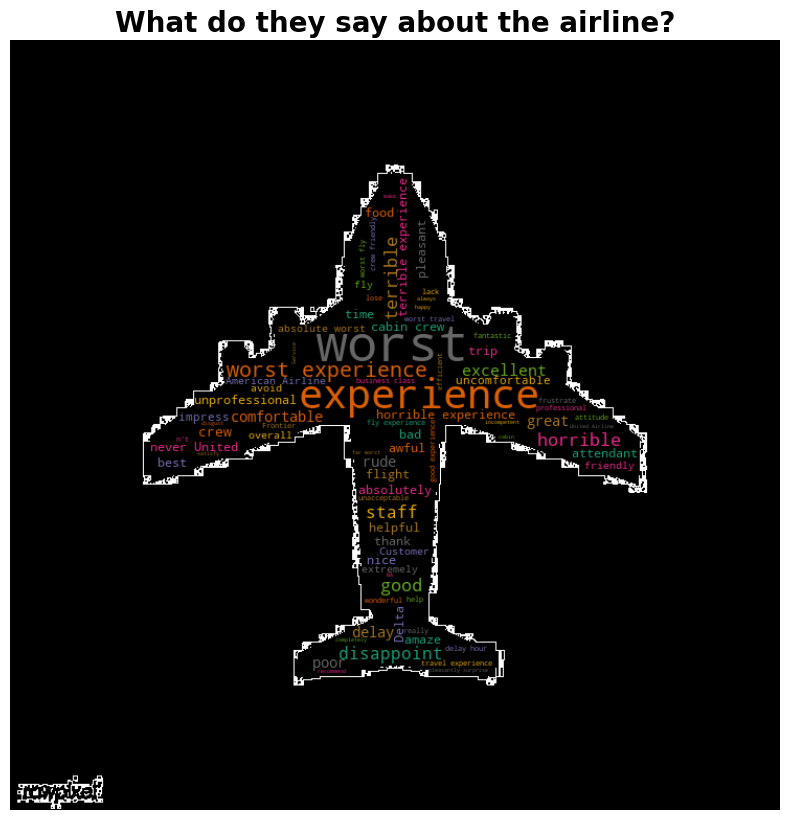

In [159]:
planes=wordcloud_df["TEXT"]
texto = " ".join(i for i in planes)
mask = np.array(Image.open("images/plane.png"))
stop_words = stopwrd

#add words that aren't in the NLTK stopwords list
new_stopwords = ['customer service','service', 'customer', 'review', 'airline', 'flight', 'seat']
new_stopwords_list = stopwrd.extend(new_stopwords)
 
wordcloud = WordCloud(stopwords=new_stopwords_list, background_color="black", max_words=80, mask=mask, colormap="Dark2", contour_width=1, contour_color="white").generate(texto)
plt.figure( figsize=(10,10))
plt.title("What do they say about the airline?", weight="bold", size=20, color="black")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('images/plane_wc.png', bbox_inches='tight', dpi=300)
plt.show()

In [160]:
stopwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

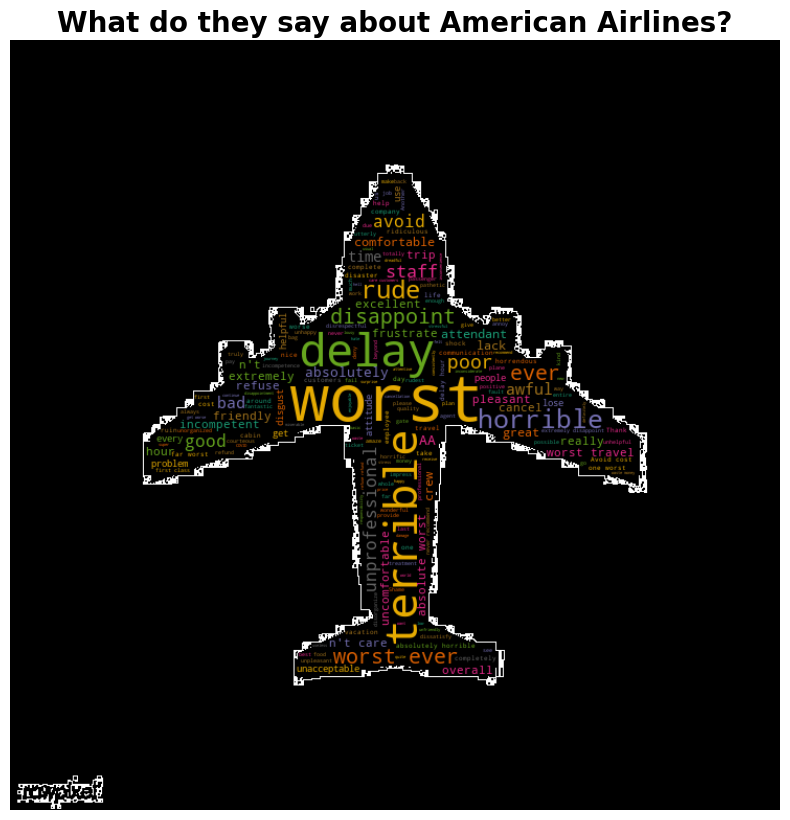

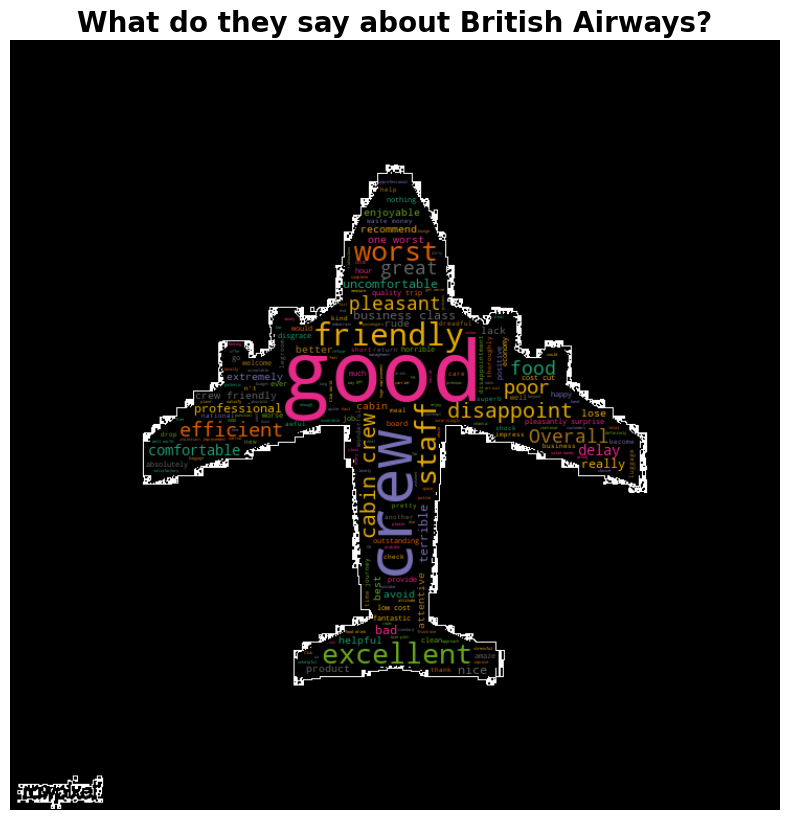

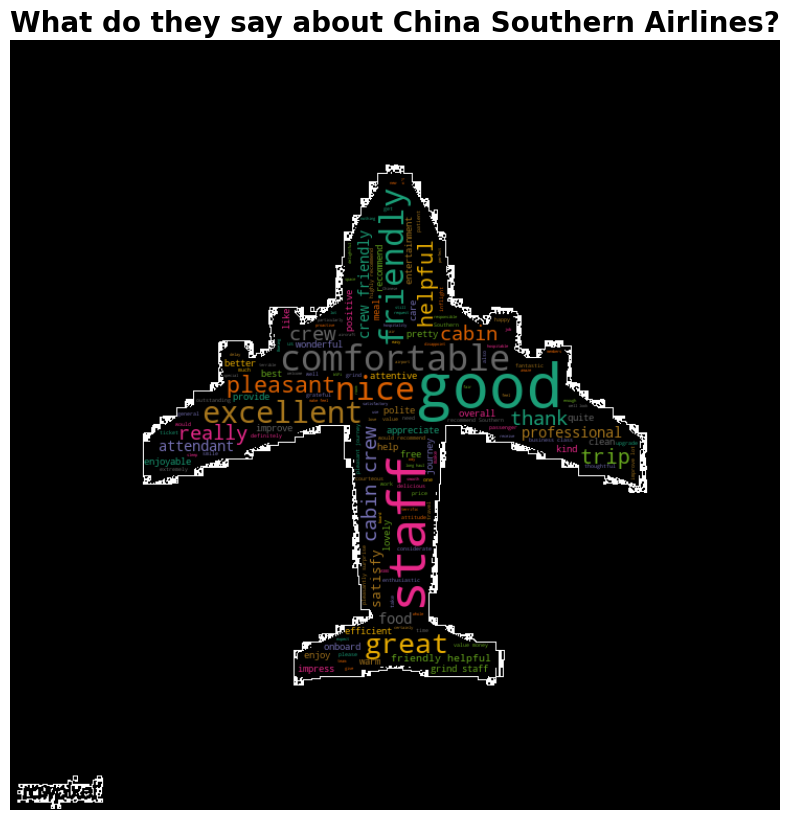

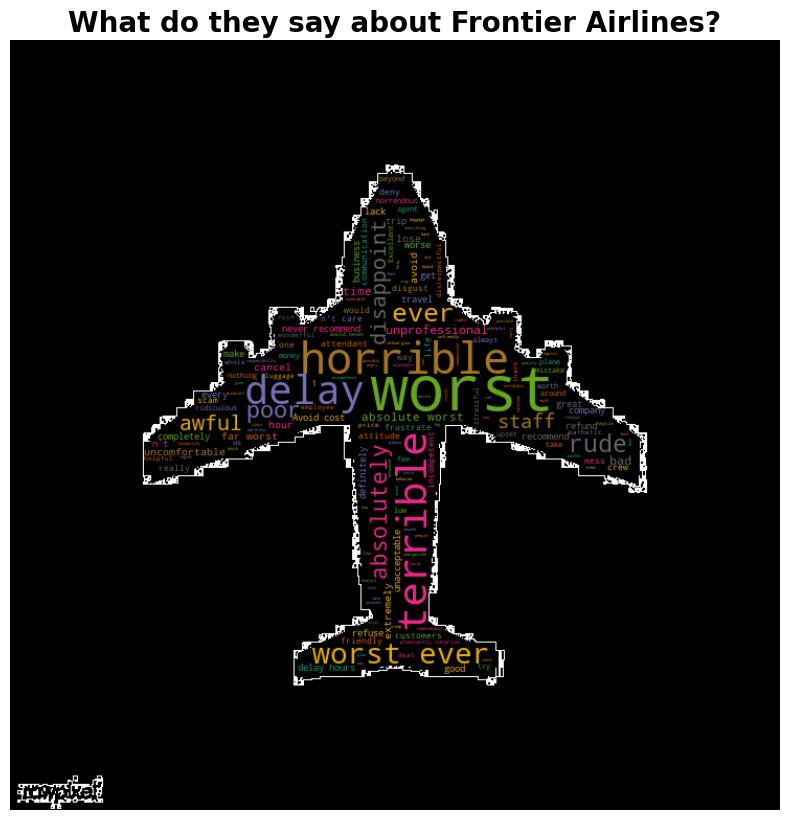

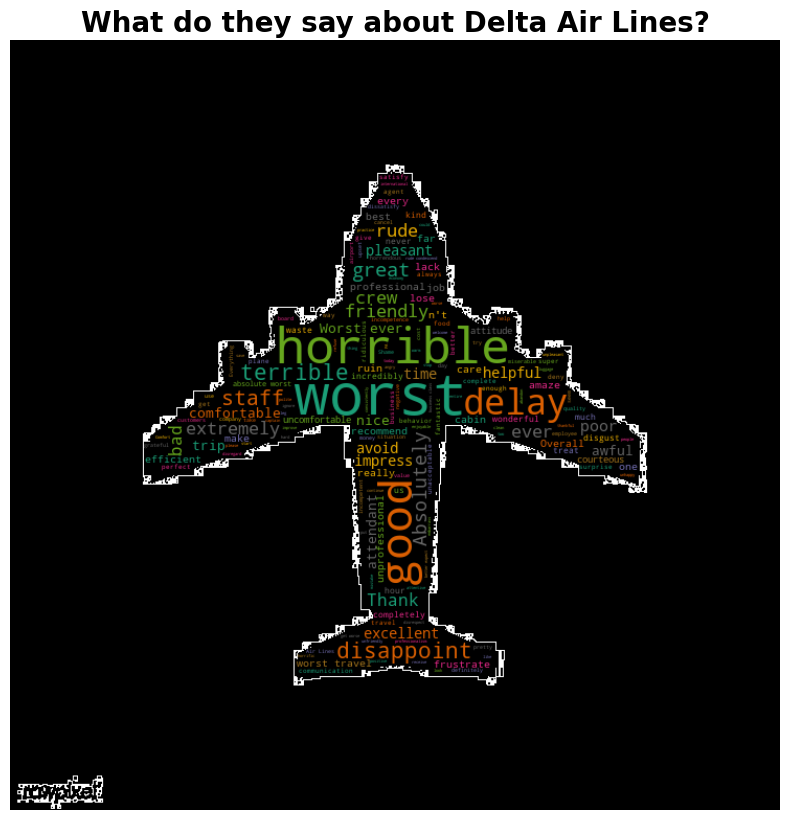

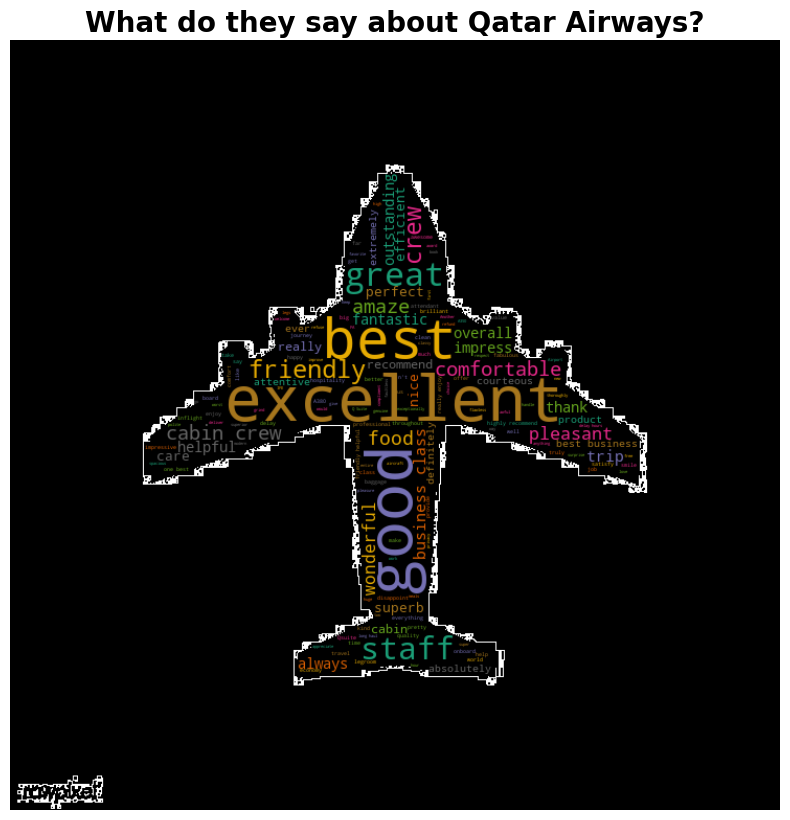

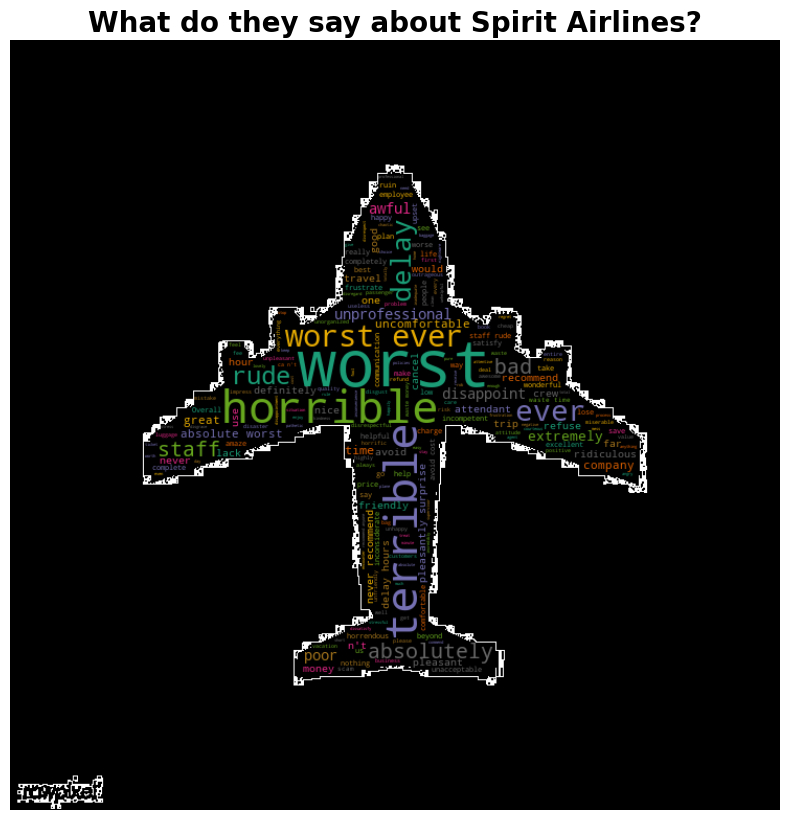

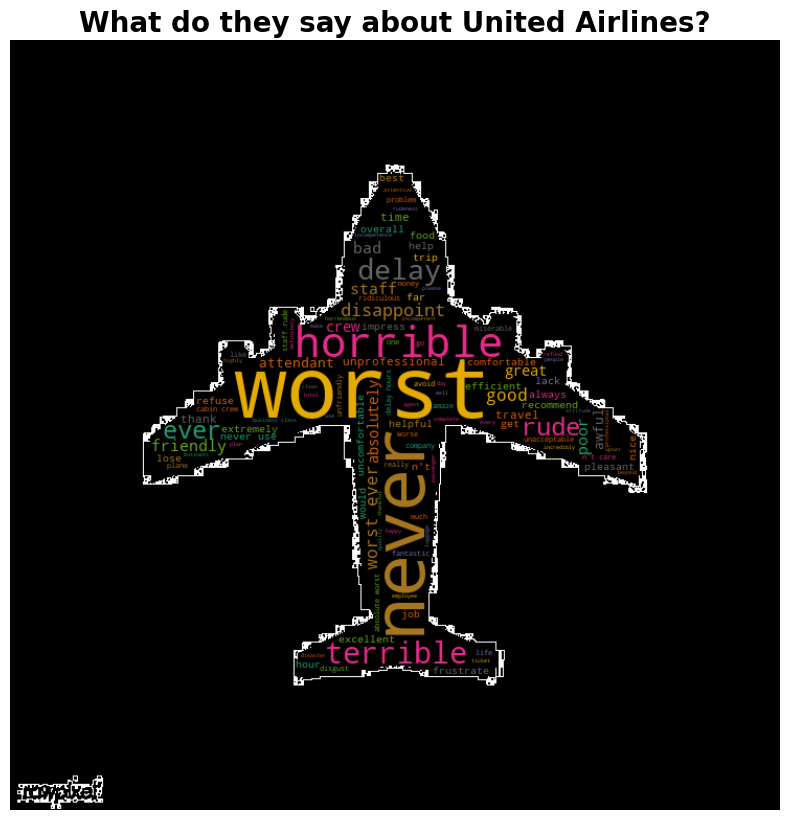

In [161]:
for i in wordcloud_df.AIRLINENAME.unique():
    aerolinea=wordcloud_df[wordcloud_df.AIRLINENAME==i]
    planes=aerolinea["TEXT"]
    texto = " ".join(i for i in planes)
    mask = np.array(Image.open("images/plane.png"))
    stop_words = stopwrd

    #add words that aren't in the NLTK stopwords list
    new_stopwords = ['customer service','service', 'customer', 'review', 'airline', 'flight', 'seat', 'experience', 'BA', 'Delta', 'United', 'China', 'American', 'Frontier', 'British', 'Qatar', 'Spirit', 'Air Lines', 'Airlines', 'Airways']
    new_stopwords_list = stopwrd + new_stopwords +airline_stopwords
    
    wordcloud = WordCloud(stopwords=new_stopwords_list, background_color="black", max_words=200, mask=mask, colormap="Dark2", contour_width=1, contour_color="white").generate(texto)
    plt.figure( figsize=(10,10))
    plt.title(f"What do they say about {i}?", weight="bold", size=20, color="black")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f'images/plane_{i}_wc.png', bbox_inches='tight', dpi=300)
